In [ ]:
import csv
import numpy as np

f = open("demographics_data_with_total_investment_feature.csv", newline='')
demo_train = open("demotrain.csv", 'w',newline='')
demo_test = open("demo_test.csv", 'w',newline='')

reader = csv.reader(f)
train_writer = csv.writer(demo_train)
test_writer = csv.writer(demo_test)

for row in reader:
    
    if row[0] == "Date":
        train_writer.writerow(row)
        test_writer.writerow(row)
    else:
        
        if np.random.rand() < .8:
            train_writer.writerow(row)
        else:
            
            test_writer.writerow(row)
demo_train.close()
demo_test.close()
f.close()
        

In [ ]:

import csv

def make_one_hot_csv(f, name):
    reader = csv.reader(f)
    reader = csv.reader(x.replace('\0', '') for x in f)
    write_file = open(name, 'w',newline='')
    writer = csv.writer(write_file)
    campaigns=[]
    audiences=[]
    genders=[]
    ages=[]
    countries=[]
    labels = [ "return","total investment"]
    for row in reader:
        
        if row[3] != 'Age':
            if not row[1] in campaigns:
                campaigns.append(row[1])
                
            if not row[3] in ages:
                ages.append(row[3])
                
            if not row[4] in genders:
                genders.append(row[4])
                
            if not row[7] in countries:
                countries.append(row[7])
                
            if not row[8] in audiences:
                audiences.append(row[8])
                
    
    reader = csv.reader(x.replace('\0', '') for x in f)
    f.seek(0)
    for campaign in campaigns:
        labels.append(campaign)
    for age in ages:
        labels.append(age)
    for gender in genders:
        labels.append(gender)
    for country in countries:
        labels.append(country)
    for audience in audiences:
        labels.append(audience)
    writer.writerow(labels)
    for row in reader:
        
        if row[6] != '' and row[0]!= "Date" :
            one_hot = []
            one_hot.append(float(row[6]))
            one_hot.append(float(row[9]))
            for campaign in campaigns:
                if row[1] == campaign:
                    one_hot.append(1)
                else:
                    one_hot.append(0)
            for age in ages:
                if row[3] == age:
                    one_hot.append(1)
                else:
                    one_hot.append(0)
            for gender in genders:
                if row[4] == gender:
                    
                    one_hot.append(1)
                else:
                    one_hot.append(0)
            for country in countries:
                
                if row[7] == country:
                    
                    one_hot.append(1)
                else:
                    one_hot.append(0)
            for audience in audiences:
                if row[8] == audience:
                    one_hot.append(1)
                else:
                    one_hot.append(0)
            
            writer.writerow(one_hot)
                
    write_file.close()
   
demo_train = open("demo_train.csv",newline='')
demo_test = open("demo_test.csv",newline='')
make_one_hot_csv(demo_train, "demo_one_hot_train.csv")
make_one_hot_csv(demo_test, "demo_one_hot_test.csv")

In [253]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.kernel_ridge import KernelRidge
import cvxpy as cp
from cvxpy.atoms.affine.binary_operators import MulExpression
import csv

from matplotlib import pyplot as plt

f = open("demo_one_hot_train.csv", newline='')
reader = csv.reader(f)
x_learn=[]
y_learn=[]
t_learn=[]

for row in reader:
    x_vals=[]
    if row[1] != "total investment":
        
        for val in row[2:]:
            x_vals.append(float(val))
        if float(row[0])>0:
            t_learn.append(float(row[1]))
            x_learn.append(x_vals)
            y_learn.append(np.log(float(row[0])))
    else:
        features=row[2:]
        
x_learn=np.array(x_learn)
t_learn_vec=np.array(t_learn)
t_learn=np.diag(t_learn)
y_learn=np.array(y_learn)
features=np.array(features)

f.close()

x_train = x_learn[splt[0:int(0.8*len(y_learn))]]
t_train = np.diag(t_learn_vec[splt[0:int(0.8*len(y_learn))]])
y_train = y_learn[splt[0:int(0.8*len(y_learn))]]

x_val = x_learn[splt[int(0.8*len(y_learn)):]]
t_val = np.diag(t_learn_vec[splt[int(0.8*len(y_learn)):]])
y_val = y_learn[splt[int(0.8*len(y_learn)):]]


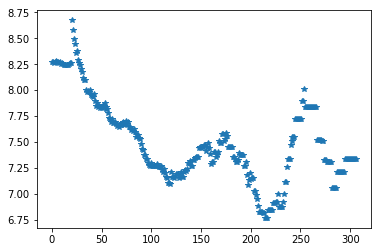

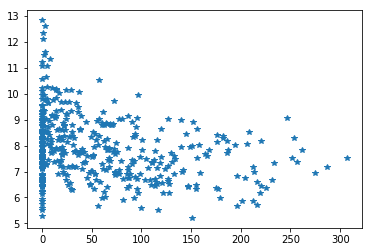

In [232]:

x_plot=[]
y_plot=[]
for i in range(1000):
    y_vals=[]
    
    for j in range(len(t_learn_vec)):
         
        if np.abs(i-t_learn_vec[j])<20:
            y_vals.append(y_learn[j])
    if len(y_vals)>1:
        x_plot.append(i)
        y_plot.append(np.mean(y_vals))

plt.plot(x_plot,y_plot,'*')
plt.show()
plt.plot(t_learn_vec,y_learn,'*')

In [402]:
#Constant
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def lin_model_MSE(t,y,w,b):
    return np.mean((np.dot(t,w)+b-y)**2)

w = cp.Variable(1)
b= cp.Variable(1)

objective = cp.Minimize(cp.sum_squares(y_train-b))

prob = cp.Problem(objective)
prob.solve()
w=np.array(w.value)
b=np.array(b.value)

print("Mean squared error")
print(np.mean((y_val-b)**2))

Mean squared error
1.529512151681477


In [404]:
#LINEAR REGRESION with  total investment
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def lin_model_MSE(t,y,w,b):
    return np.mean((np.dot(t,w)+b-y)**2)

w = cp.Variable(1)
b= cp.Variable(1)

objective = cp.Minimize(cp.sum_squares(y_train-MulExpression(np.diag(t_train),w)-b))

prob = cp.Problem(objective)
prob.solve()
w=np.array(w.value)
b=np.array(b.value)

print("Mean squared error")
print(lin_model_MSE(t_val,y_val,w,b))

Mean squared error
1.6089234945572903


In [405]:
#LINEAR REGRESION with poplulations and total investment
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def full_lin_model_MSE(x,t,y,w,b,inspt):
    return np.mean((np.dot(t,np.dot(x,w))+np.dot(x,b)+inspt-y)**2)
n=np.shape(x_learn)[1]
w = cp.Variable(n)
b= cp.Variable(n)
inspt = cp.Variable(1)
objective = cp.Minimize(cp.sum_squares(y_train-TPW(t_train, x_train, w)-MulExpression(x_train,b)-inspt))

prob = cp.Problem(objective)
prob.solve()
w=np.array(w.value)[:,0]
b=np.array(b.value)[:,0]
inspt = inspt.value
print("Mean squared error")
print(full_lin_model_MSE(x_val,t_val,y_val,w,b,inspt))

Mean squared error
2.170907699077898


In [406]:

#RIDGE REGRESION with poplulations and total investment
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def full_lin_model_MSE(x,t,y,w,slp,b,inspt):
    return np.mean((np.dot(t,np.dot(x,w))+np.diag(t)*slp+np.dot(x,b)+inspt-y)**2)
n=np.shape(x_learn)[1]
w = cp.Variable(n)
b= cp.Variable(n)
insp=cp.Variable(1)
slpt=cp.Variable(1)


best_err = -1
best_lam1 = 0
best_lam2 = 0
for i in range(100):
    lam1 = 1000*np.random.rand()
    lam2 = 1000*np.random.rand()
    objective = cp.Minimize(cp.sum_squares(y_train-TPW(t_train, x_train, w)-slp*np.diag(t_train)-MulExpression(x_train,b)-insp)
                            +lam1*cp.norm(w, p=2)+lam2*cp.norm(b, p=2))

    prob = cp.Problem(objective)
    prob.solve()
    w_ar=np.array(w.value)[:,0]
    b_ar=np.array(b.value)[:,0]
    err=full_lin_model_MSE(x_val,t_val,y_val,w_ar,slp.value,b_ar,insp.value)
    if err < best_err or best_err < 0:
        best_lam1 = lam1
        best_lam2 = lam2
        best_err = err


print(best_lam1)
print(best_lam2)
print("Mean squared error")
print(best_err)


978.0186282659467
496.93282946456486
Mean squared error
1.5194678099640402


In [389]:

#ELASTIC NET with poplulations and total investment
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def full_lin_model_MSE(x,t,y,w,slp,b,inspt):
    return np.mean((np.dot(t,np.dot(x,w))+np.diag(t)*slp+np.dot(x,b)+inspt-y)**2)
n=np.shape(x_learn)[1]
w = cp.Variable(n)
b= cp.Variable(n)
insp=cp.Variable(1)
slpt=cp.Variable(1)



best_err = -1
best_lam1 = 0
best_lam2 = 0
best_lam3 = 0
best_lam4 = 0
for i in range(100):
    lam1 = 1000*np.random.rand()
    lam2 = 1000*np.random.rand()
    lam3 = 1000*np.random.rand()
    lam4 = 1000*np.random.rand()
    objective = cp.Minimize(cp.sum_squares(y_train-TPW(t_train, x_train, w)-slp*np.diag(t_train)-MulExpression(x_train,b)-insp)
                        +lam1*cp.norm(w, p=2)+lam2*cp.norm(b, p=2)+lam3*cp.norm(w, p=1)+lam4*cp.norm(b, p=1))

    prob = cp.Problem(objective)
    prob.solve()
    w_ar=np.array(w.value)[:,0]
    b_ar=np.array(b.value)[:,0]
    err=full_lin_model_MSE(x_val,t_val,y_val,w_ar,slp.value,b_ar,insp.value)
    if err < best_err or best_err < 0:
        best_lam1 = lam1
        best_lam2 = lam2
        best_lam3 = lam3
        best_lam4 = lam4
        best_err = err

print(best_lam1)
print(best_lam2)
print(best_lam3)
print(best_lam4)
print("Mean squared error")
print(full_lin_model_MSE(x_val,t_val,y_val,w,slp.value,b,insp.value))


894.5845566991972
746.9766275267542
962.2014375550543
448.32946443314694
Mean squared error
1.2116072734637595


In [424]:

#LASSO REGRESION with poplulations and total investment
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def full_lin_model_MSE(x,t,y,w,slp,b,inspt):
    return np.mean((np.dot(t,np.dot(x,w))+np.diag(t)*slp+np.dot(x,b)+inspt-y)**2)

n=np.shape(x_train)[1]
w = cp.Variable(n)
b= cp.Variable(n)
insp=cp.Variable(1)
slp=cp.Variable(1)

splt = np.array(range(len(y_learn)))
np.random.shuffle(splt)


best_err = -1
best_lam1 = 0
best_lam2 = 0
for i in range(100):
   
    lam1 = 1000*np.random.rand()
    lam2 = 1000*np.random.rand()
    
    w = cp.Variable(n)
    b= cp.Variable(n)
    insp=cp.Variable(1)
    objective = cp.Minimize(cp.sum_squares(y_train-TPW(t_train, x_train, w)-slp*np.diag(t_train)-MulExpression(x_train,b)-insp)
                            +lam1*cp.norm(w, p=1)+lam2*cp.norm(b, p=1))

    prob = cp.Problem(objective)
    prob.solve()
    w_ar=np.array(w.value)[:,0]
    b_ar=np.array(b.value)[:,0]
    err=full_lin_model_MSE(x_val,t_val,y_val,w_ar,slp.value,b_ar,insp.value)
    
    if err < best_err or best_err < 0:
        best_lam1 = lam1
        best_lam2 = lam2
        best_err = err

print(best_lam1)
print(best_lam2)
print("Mean squared error")
print(best_err)


977.1490293149491
944.836915654647
Mean squared error
1.481747331029226


In [422]:
lam1=997.3378875385963
lam2=871.9914927586395
n=np.shape(x_train)[1]
w = cp.Variable(n)
b= cp.Variable(n)
insp=cp.Variable(1)
slp=cp.Variable(1)
objective = cp.Minimize(cp.sum_squares(y_train-TPW(t_train, x_train, w)-slp*np.diag(t_train)-MulExpression(x_train,b)-insp)
                            +lam1*cp.norm(w, p=1)+lam2*cp.norm(b, p=1))

prob = cp.Problem(objective)
prob.solve()

469.8769731971075

In [425]:
w_feature_filter=np.abs(np.array(w.value)[:,0])>10**-7
b_feature_filter=np.abs(np.array(b.value)[:,0])>10**-7

w_filtered_features = [features[i] for i in range(len(features)) if w_feature_filter[i]]
b_filtered_features = [features[i] for i in range(len(features)) if b_feature_filter[i]]
print(w_feature_filter)
print(b_feature_filter)
print(w_filtered_features)
print(b_filtered_features)

[ True False False False  True False  True  True False  True  True False
 False  True False False False  True False False False  True False False
 False  True  True  True False  True  True False False  True False  True
  True  True False  True  True  True  True  True  True  True False  True
  True  True  True  True  True]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]
['US_RCH_Campers_LeadGen', 'US_RCH_Outdoor_LeadGen', '18-24', '25-34', '45-54', '55-64', 'male', 'CA', 'Outdoor Activists', 'Lookalike (CA, 2%) - rainfactoryS71C', 'Lookalike (GB, 2%) - rainfactoryP22C', 'Lookalike (GB, 2%) - rainfactoryS71C', 'Lookalike (US, 2%) - rainfactoryP22C', 'Lookalike (US, 2%) - rainfactoryS71C', 'Adventure Travel + CF Early

In [475]:
w_filtered_x_train = x_train[:,w_feature_filter]
w_filtered_x_val = x_val[:,w_feature_filter]

b_filtered_x_train = x_train[:,b_feature_filter]
b_filtered_x_val = x_val[:,b_feature_filter]

#RIDGE REGRESION with poplulations and total investment filtered features
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def filtered_lin_model_MSE(w_x,b_x,t,y,w,slp,b,inspt):
    return np.mean((np.dot(t,np.dot(w_x,w))+np.diag(t)*slp+np.dot(b_x,b)+inspt-y)**2)
n=np.shape(w_filtered_x_learn)[1]
m=np.shape(b_filtered_x_learn)[1]
w = cp.Variable(n)
b= cp.Variable(m)
insp=cp.Variable(1)
slp = cp.Variable(1)


best_err = -1
best_lam1 = 0
best_lam2 = 0
for i in range(100):
    lam1 = 1000*np.random.rand()
    lam2 = 1000*np.random.rand()
    errs=[]
        

    objective = cp.Minimize(cp.sum_squares(y_train-TPW(t_train, w_x_train, w)-slp*np.diag(t_train)-MulExpression(b_x_train,b)-insp)
                            +lam1*cp.norm(w, p=2)+lam2*cp.norm(b, p=2))

    prob = cp.Problem(objective)
    prob.solve()
    w_ar=np.array(w.value)[:,0]
    b_ar=np.array(b.value)[:,0]
    err=filtered_lin_model_MSE(w_x_val,b_x_val,t_val,y_val,w_ar,slp.value,b_ar,insp.value)
    
    if err < best_err or best_err < 0:
        best_lam1 = lam1
        best_lam2 = lam2
        best_err = err

print(best_lam1)
print(best_lam2)
print("Mean squared error")
print(best_err)


602.6898034731454
9.088026481625654
Mean squared error
1.0665453527899522


In [418]:
w_filtered_x_train = x_train[:,w_feature_filter]
w_filtered_x_val = x_val[:,w_feature_filter]

b_filtered_x_train = x_train[:,b_feature_filter]
b_filtered_x_val = x_val[:,b_feature_filter]

#ELASTIC NET  with poplulations and total investment filtereed features
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def filtered_lin_model_MSE(w_x,b_x,t,y,w,slp,b,inspt):
    return np.mean((np.dot(t,np.dot(w_x,w))+np.diag(t)*slp+np.dot(b_x,b)+inspt-y)**2)
n=np.shape(w_filtered_x_learn)[1]
m=np.shape(b_filtered_x_learn)[1]
w = cp.Variable(n)
b= cp.Variable(m)
insp=cp.Variable(1)
slp = cp.Variable(1)


best_err = -1
best_lam1 = 0
best_lam2 = 0
best_lam3 = 0
best_lam4 = 0
for i in range(100):
    
    lam1 = 1000*np.random.rand()
    lam2 = 1000*np.random.rand()
    lam3 = 1000*np.random.rand()
    lam4 = 1000*np.random.rand()
        

    objective = cp.Minimize(cp.sum_squares(y_train-TPW(t_train, w_x_train, w)-slp*np.diag(t_train)-MulExpression(b_x_train,b)-insp)
                            +lam1*cp.norm(w, p=2)+lam2*cp.norm(b, p=2)+lam3*cp.norm(w, p=1)+lam4*cp.norm(b, p=1))

    prob = cp.Problem(objective)
    prob.solve()
    w_ar=np.array(w.value)[:,0]
    b_ar=np.array(b.value)[:,0]
    err=filtered_lin_model_MSE(w_x_val,b_x_val,t_val,y_val,w_ar,slp.value,b_ar,insp.value)
    
    if err < best_err or best_err < 0:
        best_lam1 = lam1
        best_lam2 = lam2
        best_lam3 = lam3
        best_lam4 = lam4
        best_err = err

print(best_lam1)
print(best_lam2)
print(best_lam3)
print(best_lam4)
print("Mean squared error")
print(best_err)


241.07878131343296
33.61373276964319
280.81467468729807
30.28216547897955
Mean squared error
1.4378589495297258


m

In [415]:
w_filtered_x_train = x_train[:,w_feature_filter]
w_filtered_x_val = x_val[:,w_feature_filter]

b_filtered_x_train = x_train[:,b_feature_filter]
b_filtered_x_val = x_val[:,b_feature_filter]

#ELASTIC NET  with poplulations and total investment filtereed features huber loss
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def filtered_lin_model_MSE(w_x,b_x,t,y,w,slp,b,inspt):
    return np.mean((np.dot(t,np.dot(w_x,w))+np.diag(t)*slp+np.dot(b_x,b)+inspt-y)**2)
n=np.shape(w_filtered_x_learn)[1]
m=np.shape(b_filtered_x_learn)[1]
w = cp.Variable(n)
b= cp.Variable(m)
insp=cp.Variable(1)
slp = cp.Variable(1)


best_err = -1
best_lam1 = 0
best_lam2 = 0
best_lam3 = 0
best_lam4 = 0
for i in range(100):
    
    lam1 = 1000*np.random.rand()
    lam2 = 1000*np.random.rand()
    lam3 = 1000*np.random.rand()
    lam4 = 1000*np.random.rand()
        

    objective = cp.Minimize(cp.sum_entries(cp.huber(y_train-TPW(t_train, w_x_train, w)-slp*np.diag(t_train)-MulExpression(b_x_train,b)-insp))
                            +lam1*cp.norm(w, p=2)+lam2*cp.norm(b, p=2)+lam3*cp.norm(w, p=1)+lam4*cp.norm(b, p=1))

    prob = cp.Problem(objective)
    prob.solve()
    w_ar=np.array(w.value)[:,0]
    b_ar=np.array(b.value)[:,0]
    err=filtered_lin_model_MSE(w_x_val,b_x_val,t_val,y_val,w_ar,slp.value,b_ar,insp.value)
    
    if err < best_err or best_err < 0:
        best_lam1 = lam1
        best_lam2 = lam2
        best_lam3 = lam3
        best_lam4 = lam4
        best_err = err

print(best_lam1)
print(best_lam2)
print(best_lam3)
print(best_lam4)
print("Mean squared error")
print(best_err)


430.68820488571026
86.28734992198584
688.4221754348541
8.149419855741357
Mean squared error
1.4722142975988246


In [416]:
w_filtered_x_train = x_train[:,w_feature_filter]
w_filtered_x_val = x_val[:,w_feature_filter]

b_filtered_x_train = x_train[:,b_feature_filter]
b_filtered_x_val = x_val[:,b_feature_filter]

#RIDGE REGRESION  with poplulations and total investment filtereed features huber loss
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def filtered_lin_model_MSE(w_x,b_x,t,y,w,slp,b,inspt):
    return np.mean((np.dot(t,np.dot(w_x,w))+np.diag(t)*slp+np.dot(b_x,b)+inspt-y)**2)
n=np.shape(w_filtered_x_learn)[1]
m=np.shape(b_filtered_x_learn)[1]
w = cp.Variable(n)
b= cp.Variable(m)
insp=cp.Variable(1)
slp = cp.Variable(1)




best_err = -1
best_lam1 = 0
best_lam2 = 0
best_lam3 = 0
best_lam4 = 0
for i in range(100):
    
    lam1 = 1000*np.random.rand()
    lam2 = 1000*np.random.rand()
    lam3 = 1000*np.random.rand()
    lam4 = 1000*np.random.rand()
        

    objective = cp.Minimize(cp.sum_entries(cp.huber(y_train-TPW(t_train, w_x_train, w)-slp*np.diag(t_train)-MulExpression(b_x_train,b)-insp))
                            +lam1*cp.norm(w, p=2)+lam2*cp.norm(b, p=2))

    prob = cp.Problem(objective)
    prob.solve()
    w_ar=np.array(w.value)[:,0]
    b_ar=np.array(b.value)[:,0]
    err=filtered_lin_model_MSE(w_x_val,b_x_val,t_val,y_val,w_ar,slp.value,b_ar,insp.value)
    
    if err < best_err or best_err < 0:
        best_lam1 = lam1
        best_lam2 = lam2
        best_lam3 = lam3
        best_lam4 = lam4
        best_err = err

print(best_lam1)
print(best_lam2)
print(best_lam3)
print(best_lam4)
print("Mean squared error")
print(best_err)


641.1243835753521
24.975941983992335
564.3342864888491
362.71990210839465
Mean squared error
1.2873477882938023


In [478]:
def filtered_lin_model_MSE(w_x,t,y,w,slp,inspt):
    return np.mean((np.dot(t,np.dot(w_x,w))+np.diag(t)*slp+inspt-y)**2)

#The model with the best validation error was the filtered ridge regresion
w_fltr=[ True, False, False, False,  True, False,  True,  True, False,  True,  True, False,
 False,  True, False, False, False,  True, False, False, False,  True, False, False,
 False,  True,  True,  True, False,  True,  True, False, False,  True, False,  True,
  True,  True, False,  True,  True,  True,  True,  True,  True,  True, False,  True,
  True,  True,  True,  True,  True,]
#all b features were removed by lasso, so it will not be used
filtered_features = x_train[:,w_fltr]

n=np.shape(filtered_features)[1]

w = cp.Variable(n)
lam1=602.6898034731454
insp=cp.Variable(1)
slp = cp.Variable(1)
objective = cp.Minimize(cp.sum_squares(y_train-TPW(t_train, filtered_features, w)-slp*np.diag(t_train)-insp)
                            +lam1*cp.norm(w, p=2))

prob = cp.Problem(objective)
prob.solve()
w=np.array(w.value)
slp=slp.value
insp=insp.value

print(filtered_lin_model_MSE(x_val[:,w_fltr],t_val,y_val,w,slp,insp))

1.5818005665825918


In [461]:
demo_train = open("demo_train.csv", 'r',newline='')
demo_test = open("demo_test.csv", 'r',newline='')
demo_one_hot_train =open("demo_one_hot_train.csv", 'r',newline='')
demo_one_hot_test=open("demo_one_hot_test.csv", 'r',newline='')

corrected_demo_train = open("corrected_demographics_train.csv", 'w',newline='')
corrected_demo_test = open("corrected_demographics_test.csv", 'w',newline='')

reader = csv.reader(demo_train)
one_hot_reader = csv.reader(demo_one_hot_train)
writer = csv.writer(corrected_demo_train)

for row, one_hot_row in zip(reader, one_hot_reader):
    x=[]
    
    if row[0] != "Date":
        for val in one_hot_row[2:]:
            x.append(float(val))
        x=np.array(x)[w_fltr]
        t=float(one_hot_row[1])
        row_to_write=row.copy()
        print(t*(np.dot(w,x)+slp))
        print(np.exp(t*(np.dot(w,x)+slp)+insp))
        row_to_write[6]=float(row[6])/np.exp(t*(np.dot(w,x)+slp)+insp)
        writer.writerow(row)
demo_train.close()
corrected_demo_train.close()
demo_one_hot_train.close()

reader = csv.reader(demo_test)
one_hot_reader = csv.reader(demo_one_hot_test)
writer = csv.writer(corrected_demo_test)

for row, one_hot_row in zip(reader, one_hot_test):
    x=[]
    if row[0] != "Date":
        for val in one_hot_row[2:]:
            x.append(float(val))
        x=np.array(x)[w_fltr]
        t=float(one_hot_row[1])
        row[6]=float(row[6])/np.exp(t*(np.dot(w,x)+slp)+insp)
        writer.writerow(row)
demo_test.close()
corrected_demo_test.close()
demo_one_hot_test.close()

ValueError: shapes (11,) and (31,) not aligned: 11 (dim 0) != 31 (dim 0)

In [470]:
np.shape(w)

(11, 1)

In [473]:
best_lam1

497.2920342199895